In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

X:
 [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y:
 [0 0 0 1 1 1]


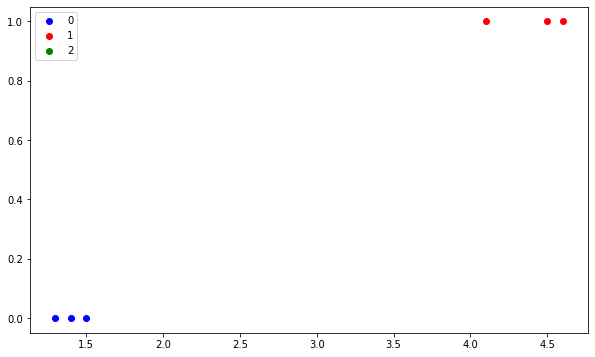

In [19]:
iris = np.genfromtxt('iris_1D_2c.csv', dtype = None, delimiter = ',', skip_header = 1)
X = iris[:, 0:1]
y = iris[:,1]

# change data type
y = y.astype('uint8') # ep ve kieu int xiu nua lam gia tri index
print('X:\n', X)
print('y:\n',y)
plt.figure(figsize=(10,6))
plt.scatter(X[y==0][:,0],y[y==0],color='b',label='0')
plt.scatter(X[y==1][:,0],y[y==1],color='r',label='1')
plt.scatter(X[y==2][:,0],y[y==2],color='g',label='2')
plt.legend()
plt.show()

### Dung 1 sample

In [20]:
N = 6 # number of samples
k = 2 # number of classes

# one hot
import numpy as np
def convert_one_hot(y,k):
    one_hot = np.zeros((len(y),k))
    one_hot[np.arange(len(y)),y] = 1
    return one_hot
y_one_hot = convert_one_hot(y,k)
print("one_hot\n",y_one_hot)

intercept = np.ones((X.shape[0],1))
X = np.concatenate((intercept,X), axis=1)
print('X\n',X)

one_hot
 [[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]
X
 [[1.  1.4]
 [1.  1.3]
 [1.  1.5]
 [1.  4.5]
 [1.  4.1]
 [1.  4.6]]


In [21]:
# initialize parameters
theta = np.array([[0.1,0.05],[0.2,-0.1]])
print('theta\n', theta)

theta
 [[ 0.1   0.05]
 [ 0.2  -0.1 ]]


In [22]:
# some parameters
learning_rate = 0.1
losses = []
num_iter = 100
for epoch in range(num_iter):
    for i in range(N):
        xi = X[i]
        yi = y_one_hot[i]
        
        # lap trinh chat che (dua ve dung dang)
        xi = xi.reshape((2,1))
        yi = yi.reshape((2,1))
        
        # compute z
        z = theta.T.dot(xi)
        
        # compute y_hat
        exp_z = np.exp(z)
        y_hat = exp_z / np.sum(exp_z,axis=0) # axis = 0 la truc doc
        
        # compute loss
        loss = -np.log(yi.T.dot(y_hat))
        # loss = -yi.T.dot(np.log(y_hat))
        losses.append(loss[0])
        
        # compute the gradient dz
        dz = y_hat - yi
        
        # compute ttheta
        dtheta = xi.dot(dz.T)
        
        # ]update
        theta = theta - learning_rate*dtheta
        
        
        

In [23]:
theta

array([[ 3.13085488, -2.98085488],
       [-1.11662847,  1.21662847]])

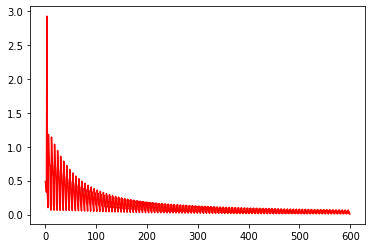

In [24]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color = 'r')
plt.show()

In [26]:
# lay data

i = 0
xi = X[i]
yi = y_one_hot[i]

xi = xi.reshape([2,1])
yi = yi.reshape((2,1))
print(xi)
print(yi)

[[1. ]
 [1.4]]
[[1.]
 [0.]]


In [27]:
# test model
z = theta.T.dot(xi)
exp_z = np.exp(z)
y_hat = exp_z/np.sum(exp_z, axis=0)
print(y_hat)

# do tin cay y_hat [0] thuoc nhom 0 = 94%
# nhom 1 = 0.05%

[[0.94506744]
 [0.05493256]]


In [28]:
predicted_class = np.argmax(y_hat, axis=0) # np.argmax lay vi tri index ma cho do co gia tri lon nhat
print(predicted_class)

[0]
